# IT3311 Assignment - Task 2: Text Classification

You are required to build a text classification model to predict the product category based on the product name and description.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model

**Done by: Sandhya Palaniappan**

## Import libraries and download the packages

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.preprocessing import Normalizer
import stopwordsiso as stopwords
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\limsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\limsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\limsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read the dataset

In [ ]:
product_df = pd.read_csv('data/data/data.csv')
product_df.head()

item_id                        item_name image_name  \
0        1  etude house drawing eye brow ad      1.jpg   
1        2      etude house drawing eyebrow      2.jpg   
2        3       etude -new drawing eyebrow      3.jpg   
3        4  etude house drawing eye brow ad      4.jpg   
4        5      etude house - color my brow      5.jpg   

                                         description category  
0  READY\n[Etude Eyebrow]\nnote : tuliskan di ket...      Eye  
1  READY JGN TNYA LAGI YA \n\nKUALITAS BOLEH DI A...      Eye  
2  Barang ORI ya..\nHarga jg sudah nett..\n\nOpti...      Eye  
3  QTY PM AJA YA :\nATC TIDAK ADA ALASAN APAPUN P...      Eye  
4  ETUDE HOUSE - COLOR MY BROW\n\nTAHAN LAMA, ALI...      Eye

## Data Understanding
Perform the necessary steps and explain the rationale taken here.

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_id      1887 non-null   int64 
 1   item_name    1887 non-null   object
 2   image_name   1887 non-null   object
 3   description  1887 non-null   object
 4   category     1887 non-null   object
dtypes: int64(1), object(4)
memory usage: 73.8+ KB


In [ ]:
product_df.shape

(1887, 5)

**To Find out if there are any null values in the dataset.**

In [ ]:
product_df.isnull().sum()

item_id        0
item_name      0
image_name     0
description    0
category       0
dtype: int64

**To Find out the distrubution of the target column.**

In [ ]:
product_df['category'].unique()

array(['Eye', 'Face', 'Lip'], dtype=object)

In [ ]:
sns.countplot(x="category",data=product_df)

<AxesSubplot:xlabel='category', ylabel='count'>

**I combined the item_name column & the description column.**

In [ ]:
product_df['item_name_desc'] = product_df['item_name']+ product_df['description']

**I visualized the combined item_name & description column using the wordcloud in order to identify what to clean for the text.**

In [ ]:
wordcloud1 = WordCloud(background_color='white',width=3000,height=2000).generate(''.join(product_df['item_name_desc']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

<Figure size 3600x2880 with 0 Axes>

## Data Preparation
Perform the necessary steps and explain the rationale taken here.



**From the wordcloud plotted during the Data understanding phase, I can see that there are strange characters found in the text which is also known as a non-ASCII characters. Therefore, I want to remove all the non-ASCII characters from the text since it would not be useful for our classification.**

In [ ]:
product_df.item_name_desc.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)

**Next, I will be preprocessing the text by lowering the case of the text, perform tokenization to break down the text into small token.**

**Afterwards, I will remove the Punctuation, Numbers and both english and malay stopwords.**

**In addition, I also remove the common words such as the make up brand from the text as I feel that since we are trying to classify the makeup category, the brand name of the make up would not be something useful for the prediction.**

**Lastly, I would perform lemmatizations to transform the text to its base word.**

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
product_df['cleaned_item_desc'] = product_df['item_name_desc'].apply(lambda x: clean_text(x))

In [ ]:
product_df['cleaned_item_desc'] = product_df['cleaned_item_desc'].apply(lambda x: word_tokenize(x))

In [ ]:
lem = WordNetLemmatizer()
stopwords_en_malay = stopwords.stopwords(["ms","en"])
common_words =['laneige','etude','maybelline','innisfree','house','dear','darling','ponds','bioaqua','estee','lauder','maybelin','pond','bb','maybeli']
def clean(doc):
    all_words_clean = []
    for word in doc:
        # remove the stopwor
        if word not in stopwords_en_malay and not word.isdigit() and word not in common_words:
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if len(punc_free) >2 and not word.isdigit():
                all_words_clean.append(lem.lemmatize(word))
    return all_words_clean
product_df['cleaned_item_desc'] = product_df['cleaned_item_desc'].apply(lambda x: clean(x))
product_df.head(5)

item_id                        item_name image_name  \
0        1  etude house drawing eye brow ad      1.jpg   
1        2      etude house drawing eyebrow      2.jpg   
2        3       etude -new drawing eyebrow      3.jpg   
3        4  etude house drawing eye brow ad      4.jpg   
4        5      etude house - color my brow      5.jpg   

                                         description category  \
0  READY\n[Etude Eyebrow]\nnote : tuliskan di ket...      Eye   
1  READY JGN TNYA LAGI YA \n\nKUALITAS BOLEH DI A...      Eye   
2  Barang ORI ya..\nHarga jg sudah nett..\n\nOpti...      Eye   
3  QTY PM AJA YA :\nATC TIDAK ADA ALASAN APAPUN P...      Eye   
4  ETUDE HOUSE - COLOR MY BROW\n\nTAHAN LAMA, ALI...      Eye   

                                      item_name_desc  \
0  etude house drawing eye brow adREADY\n[Etude E...   
1  etude house drawing eyebrowREADY JGN TNYA LAGI...   
2  etude -new drawing eyebrowBarang ORI ya..\nHar...   
3  etude house drawing eye brow adQTY PM AJA YA :...   
4  etude house - color my browETUDE HOUSE - COLOR...   

                                   cleaned_item_desc  
0  [drawing, eye, brow, adreadynote, tuliskan, ke...  
1  [drawing, eyebrowready, jgn, tnya, kualitas, a...  
2  [drawing, eyebrowbarang, ori, yaharga, nettopt...  
3  [drawing, eye, brow, adqty, aja, atc, alasan, ...  
4  [color, browetude, color, browtahan, lama, ali...

In [ ]:
product_df['preprocess_item_desc'] = product_df['cleaned_item_desc'].apply(lambda x: " ".join(x))

**Afterwards, I am reindexing the column in the dataframe because I want the category column which is the column that we are prediciting to be at the last column so that it will be eaiser to select the target column later in the modelling phase.**

In [ ]:
product_df= product_df.reindex(['item_id','item_name','image_name','description','item_name_desc','cleaned_item_desc','preprocess_item_desc','category'],axis=1)
product_df.head(5)

item_id                        item_name image_name  \
0        1  etude house drawing eye brow ad      1.jpg   
1        2      etude house drawing eyebrow      2.jpg   
2        3       etude -new drawing eyebrow      3.jpg   
3        4  etude house drawing eye brow ad      4.jpg   
4        5      etude house - color my brow      5.jpg   

                                         description  \
0  READY\n[Etude Eyebrow]\nnote : tuliskan di ket...   
1  READY JGN TNYA LAGI YA \n\nKUALITAS BOLEH DI A...   
2  Barang ORI ya..\nHarga jg sudah nett..\n\nOpti...   
3  QTY PM AJA YA :\nATC TIDAK ADA ALASAN APAPUN P...   
4  ETUDE HOUSE - COLOR MY BROW\n\nTAHAN LAMA, ALI...   

                                      item_name_desc  \
0  etude house drawing eye brow adREADY\n[Etude E...   
1  etude house drawing eyebrowREADY JGN TNYA LAGI...   
2  etude -new drawing eyebrowBarang ORI ya..\nHar...   
3  etude house drawing eye brow adQTY PM AJA YA :...   
4  etude house - color my browETUDE HOUSE - COLOR...   

                                   cleaned_item_desc  \
0  [drawing, eye, brow, adreadynote, tuliskan, ke...   
1  [drawing, eyebrowready, jgn, tnya, kualitas, a...   
2  [drawing, eyebrowbarang, ori, yaharga, nettopt...   
3  [drawing, eye, brow, adqty, aja, atc, alasan, ...   
4  [color, browetude, color, browtahan, lama, ali...   

                                preprocess_item_desc category  
0  drawing eye brow adreadynote tuliskan keterang...      Eye  
1  drawing eyebrowready jgn tnya kualitas adu tok...      Eye  
2  drawing eyebrowbarang ori yaharga nettoption d...      Eye  
3  drawing eye brow adqty aja atc alasan apapun p...      Eye  
4  color browetude color browtahan lama ali spt d...      Eye

**After all the cleaning has been done, I want to visualised the cleaned preprocess_item_desc in a wordcloud to ensure that all the necessary preprocessing has been done.**

<Figure size 2880x2160 with 0 Axes>

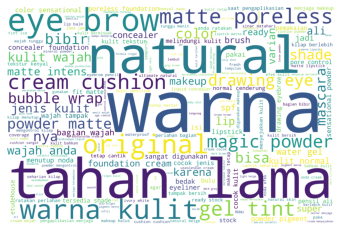

<Figure size 2880x2160 with 0 Axes>

In [ ]:
wordcloud2 = WordCloud(background_color='white',width=3000,height=2000).generate(''.join(product_df['preprocess_item_desc']))
plt.imshow(wordcloud2)
plt.axis('off')
plt.figure(figsize=(40,30))

## Modelling
Perform the necessary steps and explain the rationale taken here.



**For the Modelling Phase, I have decided to try out the different combination of the text representation using a base model which in this case I have picked Decision Tree Classifier since it is a simple algorithm to use.**

**Based on the result of the different combination of the text representation, I will select one combination that give me the best result and test it out on the other model to compare the accuracy.**

**Combination 1: Normal bag of words**

**Created Word feature using all the words in the cleaned_item_desc column in the dataframe.**

In [ ]:
all_words=[]
for word in product_df.cleaned_item_desc:
    all_words+=word
print(all_words[:10])

['drawing', 'eye', 'brow', 'adreadynote', 'tuliskan', 'keterangan', 'warna', 'item', 'dipilihpensil', 'ali']


**I have used the bag of words to represent the text because bag of words is simple and easy to use. In this case, I created the feature set for all the word in the dataframe column (cleaned_item_desc) and pass it into the feature extraction function to check if the words in the text are present in the all_words list.**

In [ ]:
def document_features(document):
    # This set function here will remove any duplicated token from the given list
    document_words = set(document)
    features = {}
    for word in all_words:
        features[word] = (word in document_words)
    return features
feature_sets = pd.DataFrame(document_features(product_df.item_name_desc), index = product_df.index)
feature_sets.head()

drawing    eye   brow  adreadynote  tuliskan  keterangan  warna   item  \
0    False  False  False        False     False       False  False  False   
1    False  False  False        False     False       False  False  False   
2    False  False  False        False     False       False  False  False   
3    False  False  False        False     False       False  False  False   
4    False  False  False        False     False       False  False  False   

   dipilihpensil    ali  ...  ketidaknyamanan  murniada  ongkirdropship  \
0          False  False  ...            False     False           False   
1          False  False  ...            False     False           False   
2          False  False  ...            False     False           False   
3          False  False  ...            False     False           False   
4          False  False  ...            False     False           False   

   apacek  diinginkanbarang  resinyainfo  lipmoisturizer  brownbrowndark  \
0   False             False        False           False           False   
1   False             False        False           False           False   
2   False             False        False           False           False   
3   False             False        False           False           False   
4   False             False        False           False           False   

   graygrayblacklight  brownnote  
0               False      False  
1               False      False  
2               False      False  
3               False      False  
4               False      False  

[5 rows x 13113 columns]

**Combination 2 : Normal bag of words for top 2000**

**I created Word feature using 2000 most frequently occuring words.**

In [ ]:
all_words_frequency = FreqDist(all_words)
print (len(all_words_frequency))
most_common_words = all_words_frequency.most_common(2000)
word_features = [item[0] for item in most_common_words]
print (word_features[:10])

13113
['kulit', 'warna', 'matte', 'cushion', 'powder', 'skin', 'wajah', 'natural', 'cream', 'foundation']


**In this case, I created the feature set for the top 2000 most frequently occuring word and the feature extractor function will check if the words are present in the word_features list.**

In [ ]:
def document_features(document):
     # This set function here will remove any duplicated token from the given list
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words)
    return features
feature_set_2000 = pd.DataFrame(document_features(product_df.item_name_desc), index = product_df.index)
feature_set_2000.head()

kulit  warna  matte  cushion  powder   skin  wajah  natural  cream  \
0  False  False  False    False   False  False  False    False  False   
1  False  False  False    False   False  False  False    False  False   
2  False  False  False    False   False  False  False    False  False   
3  False  False  False    False   False  False  False    False  False   
4  False  False  False    False   False  False  False    False  False   

   foundation  ...  maybellinepowdermatte   sexy  variety  bibirbenefits  \
0       False  ...                  False  False    False          False   
1       False  ...                  False  False    False          False   
2       False  ...                  False  False    False          False   
3       False  ...                  False  False    False          False   
4       False  ...                  False  False    False          False   

   keringhow  katalog  jakarta  creamfoundation   wrna  sweatproof  
0      False    False    False            False  False       False  
1      False    False    False            False  False       False  
2      False    False    False            False  False       False  
3      False    False    False            False  False       False  
4      False    False    False            False  False       False  

[5 rows x 2000 columns]

**Combination 3: Bag of word using term frequency feature**

**Here, I am creating a dictionary of unique words from all the words in the dataframe column and calculate the term weight of all the words using the term frequency by counting the number of times each words appear in the document.**

In [ ]:
import gensim
from gensim import corpora
# Build up the dictionary of unique words
mydict = corpora.Dictionary(product_df['cleaned_item_desc'])
vocab_len = len(mydict)

def get_bow_features(df, stemmed_tokens):
    test_features = []
    for index, row in df.iterrows():
        # Convert the token into format that the model need
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row[stemmed_tokens])],num_terms=vocab_len).toarray()[:,0]
        test_features.append(features)
    return test_features

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

bow_features = pd.DataFrame(get_bow_features(product_df, 'cleaned_item_desc'),
                            columns=header.split(','), index = product_df.index)
bow_features.head()

adreadynote  agar  ali  bermacam  bertekstur  blackapabila  brow  brown  \
0          1.0   1.0  1.0       1.0         1.0           1.0   7.0    1.0   
1          0.0   0.0  0.0       0.0         0.0           0.0   0.0    3.0   
2          0.0   0.0  0.0       0.0         0.0           0.0   0.0    0.0   
3          0.0   1.0  2.0       1.0         1.0           0.0   7.0    3.0   
4          0.0   0.0  1.0       0.0         0.0           0.0   0.0    5.0   

   browndrawing  cancelno  ...  resinyainfo  samasis  sananya  usini  \
0           2.0       1.0  ...          0.0      0.0      0.0    0.0   
1           0.0       0.0  ...          0.0      0.0      0.0    0.0   
2           0.0       0.0  ...          0.0      0.0      0.0    0.0   
3           0.0       0.0  ...          0.0      0.0      0.0    0.0   
4           0.0       0.0  ...          0.0      0.0      0.0    0.0   

   usvaseline  vaselineold  vaselineyang  brownbrowndark  brownnote  \
0         0.0          0.0           0.0             0.0        0.0   
1         0.0          0.0           0.0             0.0        0.0   
2         0.0          0.0           0.0             0.0        0.0   
3         0.0          0.0           0.0             0.0        0.0   
4         0.0          0.0           0.0             0.0        0.0   

   graygrayblacklight  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 13113 columns]

**Combination 4: Bag of word using term frequency feature for top 2000 words**

**In this case, I am creating a dictionary of unique words from the the top 2000 most frequently occuring words and calculate the term weights of the 2000 words using the term frequency.**

In [ ]:
import gensim
from gensim import corpora
# Build up the dictionary of unique words
mydict = corpora.Dictionary([word_features])
vocab_len = len(mydict)
def get_bow_features(df, stemmed_tokens):
    test_features = []
    for index, row in df.iterrows():
        # Convert the token into the format that the model need
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row[stemmed_tokens])],num_terms=vocab_len).toarray()[:,0]
        test_features.append(features)
    return test_features

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

bow_features_2000 = pd.DataFrame(get_bow_features(product_df, 'cleaned_item_desc'),
                            columns=header.split(','), index = product_df.index)
bow_features_2000.head()

abis  absorb  accurately  acid  actual  add  addict  ade  adherence  admin  \
0   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
1   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
2   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
3   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
4   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   

   ...  wrna  yaa  yah  yaitu  yellow  york  youtube  zag  zat  zig  
0  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
1  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
2  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
3  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
4  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  

[5 rows x 2000 columns]

**Combination 5: Bag of word using TF-IDF feature**

**Similarly, I created a dictionary of unique words from the dataframe column (cleaned_item_desc) and calculate the term weights of all the words using tf-idf which is more meaningful than using tf as it will assign the score to each words to see how relevant a word to a document instead of just simply counting the number of times each words appear in the document.**

In [ ]:
from gensim.models import TfidfModel
# Build up the dictionary of unique words
mydict = corpora.Dictionary(product_df['cleaned_item_desc'])
vocab_len = len(mydict)
corpus = [mydict.doc2bow(line) for line in product_df['cleaned_item_desc']]
tfidf_model = TfidfModel(corpus)

def get_tfidf_features(df, stemmed_tokens):
    test_features_tfidf = []
    for index, row in df.iterrows():
        doc = mydict.doc2bow(row[stemmed_tokens])
         # Convert the token into the format that the model need
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        test_features_tfidf.append(features)
    return test_features_tfidf

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

tfidf_features = pd.DataFrame(get_tfidf_features(product_df, 'cleaned_item_desc'),
                            columns=header.split(','), index = product_df.index)
tfidf_features.head()

adreadynote      agar       ali  bermacam  bertekstur  blackapabila  \
0     0.191099  0.075724  0.067010  0.145704    0.115201      0.191099   
1     0.000000  0.000000  0.000000  0.000000    0.000000      0.000000   
2     0.000000  0.000000  0.000000  0.000000    0.000000      0.000000   
3     0.000000  0.072935  0.129083  0.140337    0.110957      0.000000   
4     0.000000  0.000000  0.128318  0.000000    0.000000      0.000000   

       brow     brown  browndrawing  cancelno  ...  resinyainfo  samasis  \
0  0.455077  0.067391      0.347075  0.191099  ...          0.0      0.0   
1  0.000000  0.330007      0.000000  0.000000  ...          0.0      0.0   
2  0.000000  0.000000      0.000000  0.000000  ...          0.0      0.0   
3  0.438315  0.194726      0.000000  0.000000  ...          0.0      0.0   
4  0.000000  0.645239      0.000000  0.000000  ...          0.0      0.0   

   sananya  usini  usvaseline  vaselineold  vaselineyang  brownbrowndark  \
0      0.0    0.0         0.0          0.0           0.0             0.0   
1      0.0    0.0         0.0          0.0           0.0             0.0   
2      0.0    0.0         0.0          0.0           0.0             0.0   
3      0.0    0.0         0.0          0.0           0.0             0.0   
4      0.0    0.0         0.0          0.0           0.0             0.0   

   brownnote  graygrayblacklight  
0        0.0                 0.0  
1        0.0                 0.0  
2        0.0                 0.0  
3        0.0                 0.0  
4        0.0                 0.0  

[5 rows x 13113 columns]

**Combination 6 : Bag of word using TF-IDF feature for top 2000 words**

**Similarly, I created a dictionary of unique words but in this case I build up the dictionary based on the top 2000 frequently occuring words and calculate the term frequency using the tf-idf.**

In [ ]:
from gensim.models import TfidfModel
# Build up the dictionary of unique words
mydict = corpora.Dictionary([word_features])
vocab_len = len(mydict)
corpus = [mydict.doc2bow(line) for line in product_df['cleaned_item_desc']]
tfidf_model = TfidfModel(corpus)

def get_tfidf_features(df, stemmed_tokens):
    test_features_tfidf = []
    for index, row in df.iterrows():
        doc = mydict.doc2bow(row[stemmed_tokens])
         # Convert the token into the format that the model need
        features = gensim.matutils.corpus2csc([tfidf_model[doc]], num_terms=vocab_len).toarray()[:,0]
        test_features_tfidf.append(features)
    return test_features_tfidf

header = ",".join(str(mydict[ele]) for ele in range(vocab_len))

tfidf_features_2000 = pd.DataFrame(get_tfidf_features(product_df, 'cleaned_item_desc'),
                            columns=header.split(','), index = product_df.index)
tfidf_features_2000.head()

abis  absorb  accurately  acid  actual  add  addict  ade  adherence  admin  \
0   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
1   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
2   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
3   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   
4   0.0     0.0         0.0   0.0     0.0  0.0     0.0  0.0        0.0    0.0   

   ...  wrna  yaa  yah  yaitu  yellow  york  youtube  zag  zat  zig  
0  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
1  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
2  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
3  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  
4  ...   0.0  0.0  0.0    0.0     0.0   0.0      0.0  0.0  0.0  0.0  

[5 rows x 2000 columns]

**Create Train & Test Dataset for BOW**

Face    0.493042
Lip     0.265739
Eye     0.241219
Name: category, dtype: float64


<AxesSubplot:xlabel='category', ylabel='count'>

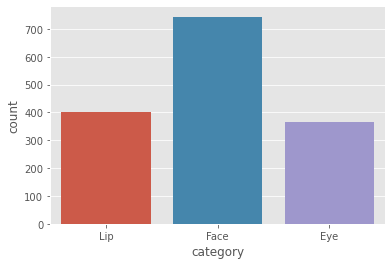

In [ ]:
from sklearn.model_selection import train_test_split

bow_X = feature_sets
y = product_df[product_df.columns[-1:]]

bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(bow_X, y, test_size=0.2, random_state=42, stratify=y)

print (bow_y_train.category.value_counts(normalize=True))
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
sns.countplot(data=bow_y_train, x='category')

**Training a DecisionTree classifer for BOW**<br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model only has the precision, recall and f1-score for the Face category of 0.49, 1.00 and 0.66 respectively.**

**This show that every classification that the model classify as Face category are all correct.<br>**

**From the accuracy score, it shows that the model only has a accuracy of 0.49 which is lower than 0.5 which means that the model cannot accurately classify the categories.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
bow_DT_classifier = DecisionTreeClassifier(random_state=42)
bow_DT_classifier.fit(bow_X_train, bow_y_train)
print(classification_report(bow_y_test, bow_DT_classifier.predict(bow_X_test)))
bow_y_pred = bow_DT_classifier.predict(bow_X_test)
print("Accuracy Score: " + str(accuracy_score(bow_y_test, bow_y_pred)))

              precision    recall  f1-score   support

         Eye       0.00      0.00      0.00        91
        Face       0.49      1.00      0.66       187
         Lip       0.00      0.00      0.00       100

    accuracy                           0.49       378
   macro avg       0.16      0.33      0.22       378
weighted avg       0.24      0.49      0.33       378

Accuracy Score: 0.4947089947089947


C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Print the confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 91 False Negative and 287 True Negative while the Face Category has 187 True Positive, 191 False Positive and the Lip Category has 100 False Negative and 278 True Negative. <br>**

**This shows that there is a high True Positive and True Negative but there is also a high False Negative and False Positive therefore the accuracy of the model is very low.**

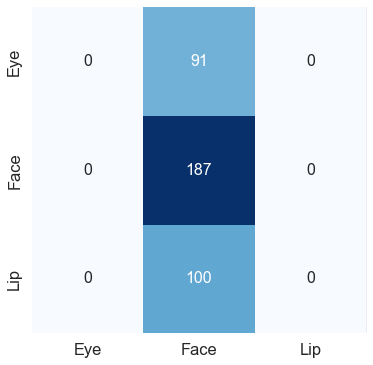

In [ ]:
def conf_matrix(bow_y_test, bow_pred_test):
    con_mat = confusion_matrix(bow_y_test, bow_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(bow_y_test, bow_y_pred)

**Training a DecisionTree classifer for BOW_2000** <br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model only has the precision, recall and f1-score for the Face category of 0.49, 1.00 and 0.66 respectively.**

**This show that every classification that the model classify as Face category are all correct.<br>**

**From the accuracy score, it shows that the model only has a accuracy of 0.49 which is lower than 0.5 which means that the model cannot accurately classify the categories.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
bow_2000_X = feature_set_2000
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
bow_2000_X_train, bow_2000_X_test, bow_2000_y_train, bow_2000_y_test = train_test_split(bow_2000_X, y, test_size=0.2, random_state=42, stratify=y)
bow_2000_DT_classifier = DecisionTreeClassifier(random_state=42)
bow_2000_DT_classifier.fit(bow_2000_X_train, bow_2000_y_train)

print(classification_report(bow_2000_y_test, bow_2000_DT_classifier.predict(bow_2000_X_test)))
bow_2000_y_pred = bow_2000_DT_classifier.predict(bow_2000_X_test)
print("Accuracy Score: " + str(accuracy_score(bow_2000_y_test, bow_2000_y_pred)))

              precision    recall  f1-score   support

         Eye       0.00      0.00      0.00        91
        Face       0.49      1.00      0.66       187
         Lip       0.00      0.00      0.00       100

    accuracy                           0.49       378
   macro avg       0.16      0.33      0.22       378
weighted avg       0.24      0.49      0.33       378

Accuracy Score: 0.4947089947089947


C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Print out confusion matrix to look at the prediction for test data** <br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 91 False Negative and 287 True Negative while the Face Category has 187 True Positive, 191 False Positive and the Lip Category has 100 False Negative and 278 True Negative. <br>**

**This shows that there is a high True Positive and True Negative but there is also a high False Negative and False Positive therefore the accuracy of the model is very low.**

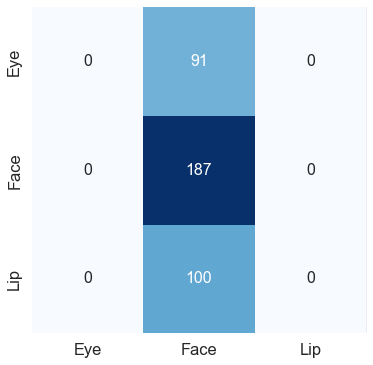

In [ ]:
def conf_matrix(bow_2000_y_test, bow_2000_pred_test):
    con_mat = confusion_matrix(bow_2000_y_test, bow_2000_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(bow_2000_y_test, bow_2000_y_pred)

**Training a DecisionTree classifer for Bag of Words using Term-frequency**<br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Lip category with a precision of 0.99, recall of 0.95 and f1-score of 0.97 and the Eye category has a precision of 0.99, recall of 0.90 and f1-score of 0.94.**

**As for the face category it has a precision of 0.93, recall of 0.99 and f1-score of 0.96.**

**From the accuracy score, the model has an accuracy of 0.96 which is a very high accuracy.**

In [ ]:
tf_X = bow_features
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, y, test_size=0.2, random_state=42, stratify=y)
tf_DT_classifier = DecisionTreeClassifier(random_state=42)
tf_DT_classifier.fit(tf_X_train, tf_y_train)
print(classification_report(tf_y_test, tf_DT_classifier.predict(tf_X_test)))
tf_y_pred = tf_DT_classifier.predict(tf_X_test)
print("Accuracy Score: " + str(accuracy_score(tf_y_test, tf_y_pred)))

              precision    recall  f1-score   support

         Eye       0.99      0.90      0.94        91
        Face       0.93      0.99      0.96       187
         Lip       0.99      0.95      0.97       100

    accuracy                           0.96       378
   macro avg       0.97      0.95      0.96       378
weighted avg       0.96      0.96      0.96       378

Accuracy Score: 0.9603174603174603


**Print out confusion matrix to look at the prediction for test data** <br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 82 True Positive, 9 False Negative, 1 False Positive and 286 True Negative while the Face Category has 186 True Positive, 1 False Negative, 13 False Positive and 178 True Negative and the Lip Category has 95 True Positive, 5 false Negative, 1 False Positive and 277 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

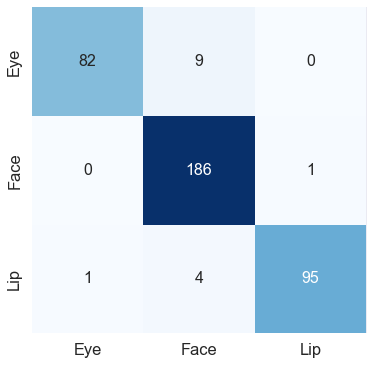

In [ ]:
def conf_matrix(tf_y_test, tf_pred_test):
    con_mat = confusion_matrix(tf_y_test, tf_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(tf_y_test, tf_y_pred)

**Training a DecisionTree classifer for Bag of Words using term frequency for top 2000 words**<br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.96, recall of 0.97 and f1-score of 0.97 and for the Eye category it has a precision of 0.98, recall of 0.93 and a f1-score of 0.96.**

**As for the Lip category it has a precision of 0.94, recall of 0.96 and f1-score of 0.95. <br>**

**From the accuracy score, the model has an accuracy of 0.96 which is a very high accuracy.**

In [ ]:
tf_2000_X = bow_features_2000
tf_2000_X_train, tf_2000_X_test, tf_2000_y_train, tf_2000_y_test = train_test_split(tf_2000_X, y, test_size=0.2, random_state=42, stratify=y)
tf_2000_DT_classifier = DecisionTreeClassifier(random_state=42)
tf_2000_DT_classifier.fit(tf_2000_X_train, tf_2000_y_train)
print(classification_report(tf_2000_y_test, tf_2000_DT_classifier.predict(tf_2000_X_test)))
tf_2000_y_pred = tf_2000_DT_classifier.predict(tf_2000_X_test)
print("Accuracy Score: " + str(accuracy_score(tf_2000_y_test, tf_2000_y_pred)))

              precision    recall  f1-score   support

         Eye       0.98      0.93      0.96        91
        Face       0.96      0.97      0.97       187
         Lip       0.94      0.96      0.95       100

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Accuracy Score: 0.9603174603174603


**Print out confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 85 True Positive, 6 False Negative, 2 False Positive and 285 True Negative while the Face Category has 182 True Positive, 5 False Negative, 7 False Positive and 184 True Negative and the Lip Category has 96 True Positive, 4 false Negative, 6 False Positive and 272 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

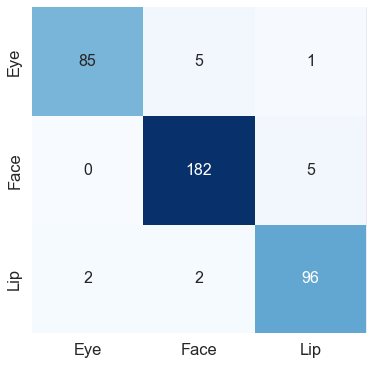

In [ ]:
def conf_matrix(tf_2000_y_test, tf_2000_pred_test):
    con_mat = confusion_matrix(tf_2000_y_test, tf_2000_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(tf_2000_y_test, tf_2000_y_pred)

**Training a DecisionTreeclassifer for Bag of Words using TF-IDF feature**<br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Lip category with a precision of 0.99, recall of 0.94 and f1-score of 0.96 and for the Eye category it has a precision of 0.97, recall of 0.91 and f1-sore of 0.96.**

**As for the Face Category it has a precision of 0.97, recall of 0.91 and f1-score of 0.94. <br>**

**From the accuracy score, the model has an accuracy of 0.955 which is a very high accuracy.**

In [ ]:
tfidf_X = tfidf_features
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X, y, test_size=0.2, random_state=42, stratify=y)
tfidf_DT_classifier = DecisionTreeClassifier(random_state=42)
tfidf_DT_classifier.fit(tfidf_X_train, tfidf_y_train)
print(classification_report(tfidf_y_test, tfidf_DT_classifier.predict(tfidf_X_test)))
tfidf_y_pred = tfidf_DT_classifier.predict(tfidf_X_test)
print("Accuracy Score: " + str(accuracy_score(tfidf_y_test, tfidf_y_pred)))

              precision    recall  f1-score   support

         Eye       0.97      0.91      0.94        91
        Face       0.93      0.98      0.96       187
         Lip       0.99      0.94      0.96       100

    accuracy                           0.96       378
   macro avg       0.96      0.95      0.95       378
weighted avg       0.96      0.96      0.95       378

Accuracy Score: 0.955026455026455


**Print out confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix , the Eye category has 83 True Positive, 8 False Negative, 3 False Positive and 284 True Negative while the Face Category has 184 True Positive, 3 False Negative, 13 False Positive and 178 True Negative and the Lip Category has 94 True Positive, 6 false Negative, 1 False Positive and 277 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

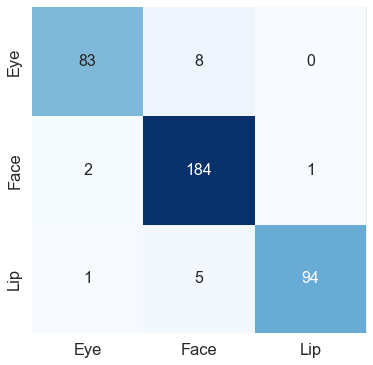

In [ ]:
def conf_matrix(tfidf_y_test, tfidf_pred_test):
    con_mat = confusion_matrix(tfidf_y_test, tfidf_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(tfidf_y_test, tfidf_y_pred)

**Training a DecisionTreeclassifer for Bag of Words using TF-IDF feature for top 2000 words**<br>

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Lip category with a precision, recall and f1-score of 0.97 and for the Eye category it has precision of 0.99, recall of 0.90 and f1-score of 0.94. As for the face category, it has a precision of 0.94, recall of 0.98 and f1-score of 0.96. <br>**

**From the accuracy score, the model has an accuracy of 0.96 which is a very high accuracy.**

In [ ]:
tfidf_2000_X = tfidf_features_2000
tfidf_2000_X_train, tfidf_2000_X_test, tfidf_2000_y_train, tfidf_2000_y_test = train_test_split(tfidf_2000_X, y, test_size=0.2, random_state=42, stratify=y)
tfidf_2000__DT_classifier = DecisionTreeClassifier(random_state=42)
tfidf_2000__DT_classifier.fit(tfidf_2000_X_train, tfidf_2000_y_train)
print(classification_report(tfidf_2000_y_test, tfidf_2000__DT_classifier.predict(tfidf_2000_X_test)))
tfidf_2000_y_pred = tfidf_2000__DT_classifier.predict(tfidf_2000_X_test)
print("Accuracy Score: " + str(accuracy_score(tfidf_2000_y_test, tfidf_2000_y_pred)))

              precision    recall  f1-score   support

         Eye       0.99      0.90      0.94        91
        Face       0.94      0.98      0.96       187
         Lip       0.97      0.97      0.97       100

    accuracy                           0.96       378
   macro avg       0.97      0.95      0.96       378
weighted avg       0.96      0.96      0.96       378

Accuracy Score: 0.9603174603174603


**Print out confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 82 True Positive, 9 False Negative, 1 False Positive and 286 True Negative while the Face Category has 184 True Positive, 3 False Negative, 11 False Positive and 180 True Negative and the Lip Category has 97 True Positive, 3 false Negative, 3 False Positive and 275 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

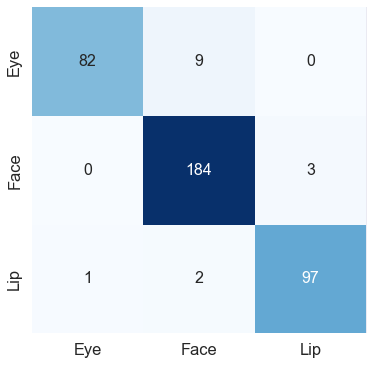

In [ ]:
def conf_matrix(tfidf_2000_y_test, tfidf_2000_pred_test):
    con_mat = confusion_matrix(tfidf_2000_y_test, tfidf_2000_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix(tfidf_2000_y_test, tfidf_2000_y_pred)

### Trying out the different model for Combination 4 - Bag of Words using term frequency for top 2000 frequently occuring words.

**Training a Naive bayes classifier using Bag of Words using term frequency for top 2000 words**<br>

**I have use Naive bayes as it is a classifier that is well know for classifying multi class and it is also easy to use. <br>**

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a a better score for the Lip Category with a precision of 0.92, recall of 0.94 and f1-score of 0.93 and the Eye category has a precision of 0.85, recall of 0.87 and a f1-score of 0.85.**

**As for the Face category it has a precision of 0.94, recall of 0.91 and f1-score of 0.93. <br>**

**From the accuracy score, the model has an accuracy of 0.91 which is a high accuracy.**

In [ ]:
Nb_X = bow_features_2000
Nb_X_train, Nb_X_test, Nb_y_train, Nb_y_test = train_test_split(Nb_X, y, test_size=0.2, random_state=42, stratify=y)
from sklearn.naive_bayes import GaussianNB
Nb_classifier = GaussianNB()
Nb_classifier.fit(Nb_X_train, np.ravel(Nb_y_train))
print(classification_report(Nb_y_test, Nb_classifier.predict(Nb_X_test)))
Nb_y_pred = Nb_classifier.predict(Nb_X_test)
print("Accuracy Score: " + str(accuracy_score(Nb_y_test, Nb_y_pred)))

              precision    recall  f1-score   support

         Eye       0.84      0.87      0.85        91
        Face       0.94      0.91      0.93       187
         Lip       0.92      0.94      0.93       100

    accuracy                           0.91       378
   macro avg       0.90      0.91      0.90       378
weighted avg       0.91      0.91      0.91       378

Accuracy Score: 0.91005291005291


**Print out confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 79 True Positive, 12 False Negative, 15 False Positive and 272 True Negative while the Face Category has 171 True Positive, 16 False Negative, 11 False Positive and 180 True Negative and the Lip Category has 94 True Positive, 6 false Negative, 8 False Positive and 270 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

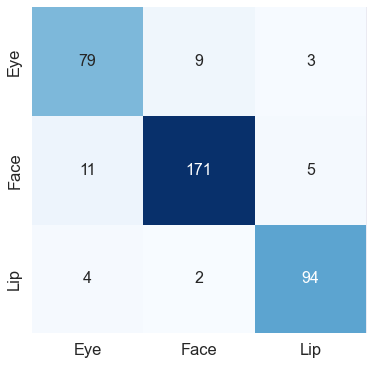

In [ ]:
def conf_matrix(Nb_y_test, Nb_pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(Nb_y_test, Nb_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(Nb_y_test,Nb_y_pred)

**Training Naive Bayes classifier after tuning the hyperparameter** <br>

**After seeing the results from the Naive Bayes Classifier, I want to find out the best hyper parameter and accuracy score for the model to improve the model accuracy using the Gridsearch cv where it would test out with the different hyperparameter and give me the hyperparameter that gives me that the best result.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=42)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=Nb_classifier, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(Nb_X_test)
gs_NB.fit(Data_transformed,np.ravel(Nb_y_test));

C:\Users\limsi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

**Indeed after tunning the hyperparameter, the accuaracy of the Naive Bayes Classifier have improved from the previous 0.91 to 0.98.**

**Based on this classification report, I can see that the model has a better score for the Lip category with a precision of 0.99, recall of 1.00 and f1-score of 1.00 and the Eye category with a precision of 0.95, recall of 1.00 and a f1-score of 0.97.**

**As for the face category it has a precision of 1.00, recall of 0.97 and f1-score of 0.98.**

In [ ]:
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
print(classification_report(Nb_y_test, gs_NB.predict(Data_transformed)))
accuracy_test = accuracy_score(Nb_y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

              precision    recall  f1-score   support

         Eye       0.95      1.00      0.97        91
        Face       1.00      0.97      0.98       187
         Lip       0.99      1.00      1.00       100

    accuracy                           0.98       378
   macro avg       0.98      0.99      0.98       378
weighted avg       0.98      0.98      0.98       378

accuracy_score on test dataset :  0.9841269841269841


**Training a Logistic Regression classifier**<br>

**I have use a Logistic regression as it is classifier that is easy to implement, interpret. <br>**

**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision, recall and f1-score of 0.99 and the Eye category has a precision of 0.99 and a recall and f1-score of 0.98.**

**As for the Lip category, it has a precision of 0.97, recall of 0.99 and f1-score of 0.98. <br>**

**From the accuracy score, the model has an accuracy of 0.99 which is a very high accuracy.**

In [ ]:
from sklearn import linear_model
Lr_X = bow_features_2000
Lr_X_train, Lr_X_test, Lr_y_train, Lr_y_test = train_test_split(Lr_X, y, test_size=0.2, random_state=42, stratify=y)
Lr_classifier = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
Lr_classifier.fit(Lr_X_train, np.ravel(Lr_y_train))
print(classification_report(Lr_y_test, Lr_classifier.predict(Lr_X_test)))
Lr_y_pred = Lr_classifier.predict(Lr_X_test)
print("Accuracy Score: " + str(accuracy_score(Lr_y_test, Lr_y_pred)))

              precision    recall  f1-score   support

         Eye       0.99      0.98      0.98        91
        Face       0.99      0.99      0.99       187
         Lip       0.97      0.99      0.98       100

    accuracy                           0.99       378
   macro avg       0.98      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378

Accuracy Score: 0.9867724867724867


**Print out confusion matrix to look at the prediction for test data**<br>

**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 89 True Positive, 2 False Negative, 1 False Positive and 286 True Negative while the Face Category has 185 True Positive, 2 False Negative, 1 False Positive and 190 True Negative and the Lip Category has 99 True Positive, 1 false Negative, 3 False Positive and 275 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

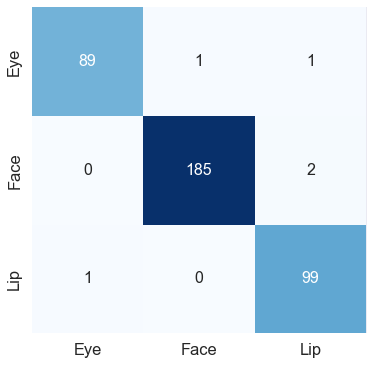

In [ ]:
def conf_matrix(Lr_y_test, Lr_pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(Lr_y_test, Lr_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(Lr_y_test, Lr_y_pred)

**Training a KNN classifier**<br>
**From the classification report, we are able to see the precision, recall, F1 and support scores for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face Category with a precision of 0.97, recall of 0.91 and f1-score of 0.94 and for the Eye category it has a precision of 0.85, recall of 0.95 and a f1-score of 0.90.**

**As for the Lip category it has a precision of 0.91, recall and f1-score of 0.92 <br>**

**From the accuracy score, the model has an accuracy of 0.921 which is a very high accuracy.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_X = bow_features_2000
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, y, test_size=0.2, random_state=42, stratify=y)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(knn_X_train, np.ravel(knn_y_train))
print(classification_report(knn_y_test, knn_classifier.predict(knn_X_test)))
knn_y_pred = knn_classifier.predict(knn_X_test)
print("Accuracy Score: " + str(accuracy_score(knn_y_test, knn_y_pred)))

              precision    recall  f1-score   support

         Eye       0.85      0.95      0.90        91
        Face       0.97      0.91      0.94       187
         Lip       0.91      0.92      0.92       100

    accuracy                           0.92       378
   macro avg       0.91      0.92      0.92       378
weighted avg       0.92      0.92      0.92       378

Accuracy Score: 0.9206349206349206


**Print out confusion matrix to look at the prediction for test data**<br>


**For classification, we would use the confusion matrix to have a more comprehensive overview of the performances of the model.**

**From the confusion matrix, the Eye category has 86 True Positive, 5 False Negative, 15 False Positive and 272 True Negative while the Face Category has 170 True Positive, 17 False Negative, 6 False Positive and 185 True Negative and the Lip Category has 92 True Positive, 8 false Negative, 9 False Positive and 269 True Negative. <br>**

**This shows that there is a high True Positive and True Negative and a very low False Negative and False Positive therefore the accuracy of the model is quite accurate with very low error when classifying.**

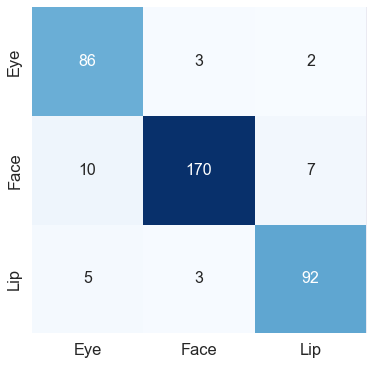

In [ ]:
def conf_matrix(knn_y_test, knn_pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(knn_y_test, knn_pred_test)
    con_mat = pd.DataFrame(con_mat, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Ploting the confusion matrix
conf_matrix(knn_y_test, knn_y_pred)

**Training KNN classifier after tuning the hyperparamters**<br>

**After seeing the result from the KNN classifier, I want to find out the best hyperparameter and accuracy score for the model so as to improve the accuracy. I am using gridsearch cv where it would try out the various hyperparameter and return the hyperparameter that gives the best accuracy.**

In [ ]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,30))
leaf_size = list(range(1,50))
p=[1,2]
#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Making model
clf = GridSearchCV(knn_classifier, hyperparameters, cv=10)
best_model = clf.fit(knn_X_train, np.ravel(knn_y_train))
#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
knn_y_pred = best_model.predict(knn_X_test)
#Check performance using accuracy
print(accuracy_score(knn_y_test, knn_y_pred))

Best p: 2
Best leaf_size: 30
Best n_neighbors: 1
0.9232804232804233


**However after tunning the hyperparameter, the accuracy of the Knn Classifier have only improved by a bit from the previous 0.9206 to 0.923.**

**Based on the classification report, I can see that the model has a better score for the Face category with a precision of 0.93, recall of 0.96 and f1-score of 0.94 and the Eye category has a precision of 0.94, recall of 0.85 and f1-score of 0.89.**

**As for the Lip category, it has a precision of 0.90, reall of 0.95 and f1-score of 0.93.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_X = bow_features_2000
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, y, test_size=0.2, random_state=42, stratify=y)
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2,leaf_size=30)
knn_classifier.fit(knn_X_train, np.ravel(knn_y_train))
print(classification_report(knn_y_test, knn_classifier.predict(knn_X_test)))
knn_y_pred = knn_classifier.predict(knn_X_test)
print("Accuracy Score: " + str(accuracy_score(knn_y_test, knn_y_pred)))

              precision    recall  f1-score   support

         Eye       0.94      0.85      0.89        91
        Face       0.93      0.95      0.94       187
         Lip       0.90      0.95      0.93       100

    accuracy                           0.92       378
   macro avg       0.92      0.91      0.92       378
weighted avg       0.92      0.92      0.92       378

Accuracy Score: 0.9232804232804233


## Evaluation
Perform the necessary steps and explain the rationale taken here.



###  Which combination of Text Representation should I use?

In [ ]:
print('Combination 1: Normal Bag of Words')
print("-"*60)
print(classification_report(bow_y_test, bow_DT_classifier.predict(bow_X_test)))
print("Accuracy Score: " + str(accuracy_score(bow_y_test, bow_y_pred)))
print(" ")

print('Combination 2: Normal Bag of Words for top 2000 frequently occuring words')
print("-"*60)
print(classification_report(bow_2000_y_test, bow_2000_DT_classifier.predict(bow_2000_X_test)))
print("Accuracy Score: " + str(accuracy_score(bow_2000_y_test, bow_2000_y_pred)))
print(" ")

print('Combination 3: Bag of Words using term frequency')
print("-"*60)
print(classification_report(tf_y_test, tf_DT_classifier.predict(tf_X_test)))
print("Accuracy Score: " + str(accuracy_score(tf_y_test, tf_y_pred)))
print(" ")

print('Combination 4: Bag of Words using term frequency for top 2000 frequently occuring words')
print("-"*60)
print(classification_report(tf_2000_y_test, tf_2000_DT_classifier.predict(tf_2000_X_test)))
print("Accuracy Score: " + str(accuracy_score(tf_2000_y_test, tf_2000_y_pred)))
print(" ")

print('Combination 5: Bag of Words using tf-idf')
print("-"*60)
print(classification_report(tfidf_y_test, tfidf_DT_classifier.predict(tfidf_X_test)))
print("Accuracy Score: " + str(accuracy_score(tfidf_y_test, tfidf_y_pred)))
print(" ")

print('Combination 6: Bag of Words using tf-idf for top 2000 frequently occuring words')
print("-"*60)
print(classification_report(tfidf_2000_y_test, tfidf_2000__DT_classifier.predict(tfidf_2000_X_test)))
print("Accuracy Score: " + str(accuracy_score(tfidf_2000_y_test, tfidf_2000_y_pred)))

Combination 1: Normal Bag of Words
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.00      0.00      0.00        91
        Face       0.49      1.00      0.66       187
         Lip       0.00      0.00      0.00       100

    accuracy                           0.49       378
   macro avg       0.16      0.33      0.22       378
weighted avg       0.24      0.49      0.33       378

Accuracy Score: 0.4947089947089947
 
Combination 2: Normal Bag of Words for top 2000 frequently occuring words
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.00      0.00      0.00        91
        Face       0.49      1.00      0.66       187
         Lip       0.00      0.00      0.00       100

    accuracy                           0.49       378
   macro avg       0.16      0.33      0.22       378
weighted avg       0.24  

C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

         Eye       0.97      0.91      0.94        91
        Face       0.93      0.98      0.96       187
         Lip       0.99      0.94      0.96       100

    accuracy                           0.96       378
   macro avg       0.96      0.95      0.95       378
weighted avg       0.96      0.96      0.95       378

Accuracy Score: 0.955026455026455
 
Combination 6: Bag of Words using tf-idf for top 2000 frequently occuring words
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.99      0.90      0.94        91
        Face       0.94      0.98      0.96       187
         Lip       0.97      0.97      0.97       100

    accuracy                           0.96       378
   macro avg       0.97      0.95      0.96       378
weighted avg       0.96      0.96      0.96       378

Accuracy Score: 0.9603174603174603


**Even though the combination 3, 4 and 6 all has the same accuracy but there is some difference in their F1 score, precision and Recall.**

**After looking at the F1 score of the 3 different combinations, I have decided to select combination 4 which is to represent the text through bag of words using term frequency for the top 2000 frequently occuring words as it has the highest F1 score for the various categories as compared to the other 2 combinations.**

**Therefore based on combination 4, I will be trying out with the different modelling algorithm such as logistic regression, naive bayes, KNN to compare the accuracy.**

###  Which model give me a higher accuracy?

In [ ]:
print('Decision Tree Classifier')
print("-"*60)
print(classification_report(tf_2000_y_test, tf_2000_DT_classifier.predict(tf_2000_X_test)))
print("Accuracy Score: " + str(accuracy_score(tf_2000_y_test, tf_2000_y_pred)))
print(" ")

print('Naive Bayes Classifier')
print("-"*60)
print(classification_report(Nb_y_test, Nb_classifier.predict(Nb_X_test)))
print('accuracy_score on test dataset : ', accuracy_test)
print(" ")

print('Logistic Regression classifier')
print("-"*60)
print(classification_report(Lr_y_test, Lr_classifier.predict(Lr_X_test)))
print("Accuracy Score: " + str(accuracy_score(Lr_y_test, Lr_y_pred)))
print(" ")

print('KNN classifier')
print("-"*60)
print(classification_report(knn_y_test, knn_classifier.predict(knn_X_test)))
print("Accuracy Score: " + str(accuracy_score(knn_y_test, knn_y_pred)))

Decision Tree Classifier
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.98      0.93      0.96        91
        Face       0.96      0.97      0.97       187
         Lip       0.94      0.96      0.95       100

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Accuracy Score: 0.9603174603174603
 
Naive Bayes Classifier
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.84      0.87      0.85        91
        Face       0.94      0.91      0.93       187
         Lip       0.92      0.94      0.93       100

    accuracy                           0.91       378
   macro avg       0.90      0.91      0.90       378
weighted avg       0.91      0.91      0.91       378

accuracy_score on test dataset 

**After training with multiple model, I have compared the model result of the various model and logistic regression is the model that gives the highest accuracy of 0.99 for the combination 4 (represent the text through bag of words for the top 2000 frequently occuring words).**

**In addition, by training it with logistic regression it has a much higher true positive and true negative and also a high f1 score of 0.99.**